# Tiến hành làm sạch dữ liệu cổ phiếu Amazon sau khi thu thập

    Import thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path 
import warnings
warnings.filterwarnings('ignore')

    Đọc dữ liệu thô từ file raw_data.csv

In [3]:
data = pd.read_csv('./raw data/raw_data.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-05,1007.229980,1013.210022,1003.510010,1011.340027,1011.340027,2719900
1,2017-06-06,1012.000000,1016.500000,1001.250000,1003.000000,1003.000000,3346400
2,2017-06-07,1005.950012,1010.250000,1002.000000,1010.070007,1010.070007,2823000
3,2017-06-08,1012.059998,1013.609985,1006.109985,1010.270020,1010.270020,2767900
4,2017-06-09,1012.500000,1012.989990,927.000000,978.309998,978.309998,7647700
...,...,...,...,...,...,...,...
1255,2022-05-27,2271.000000,2303.739990,2252.560059,2302.929932,2302.929932,4683000
1256,2022-05-31,2325.600098,2439.889893,2313.500000,2404.189941,2404.189941,7231700
1257,2022-06-01,2445.120117,2503.580078,2412.449951,2433.679932,2433.679932,6376400
1258,2022-06-02,2433.679932,2512.199951,2400.899902,2510.219971,2510.219971,5028000


    Kiểm tra thông tin dữ liệu

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


    Loại bỏ thành phần không mong muốn

In [5]:
data.drop(['Adj Close'], axis=1, inplace=True)
data

,Date,Open,High,Low,Close,Volume
0,2017-06-05,1007.229980,1013.210022,1003.510010,1011.340027,2719900
1,2017-06-06,1012.000000,1016.500000,1001.250000,1003.000000,3346400
2,2017-06-07,1005.950012,1010.250000,1002.000000,1010.070007,2823000
3,2017-06-08,1012.059998,1013.609985,1006.109985,1010.270020,2767900
4,2017-06-09,1012.500000,1012.989990,927.000000,978.309998,7647700
...,...,...,...,...,...,...
1255,2022-05-27,2271.000000,2303.739990,2252.560059,2302.929932,4683000
1256,2022-05-31,2325.600098,2439.889893,2313.500000,2404.189941,7231700
1257,2022-06-01,2445.120117,2503.580078,2412.449951,2433.679932,6376400
1258,2022-06-02,2433.679932,2512.199951,2400.899902,2510.219971,5028000


    Vẽ giá cổ phiếu Amazon cho toàn bộ thời gian 2017-2022

Text(0.5, 1.0, 'Giá cổ phiếu Amazon cho toàn bộ thời gian (2017 - 2022)')

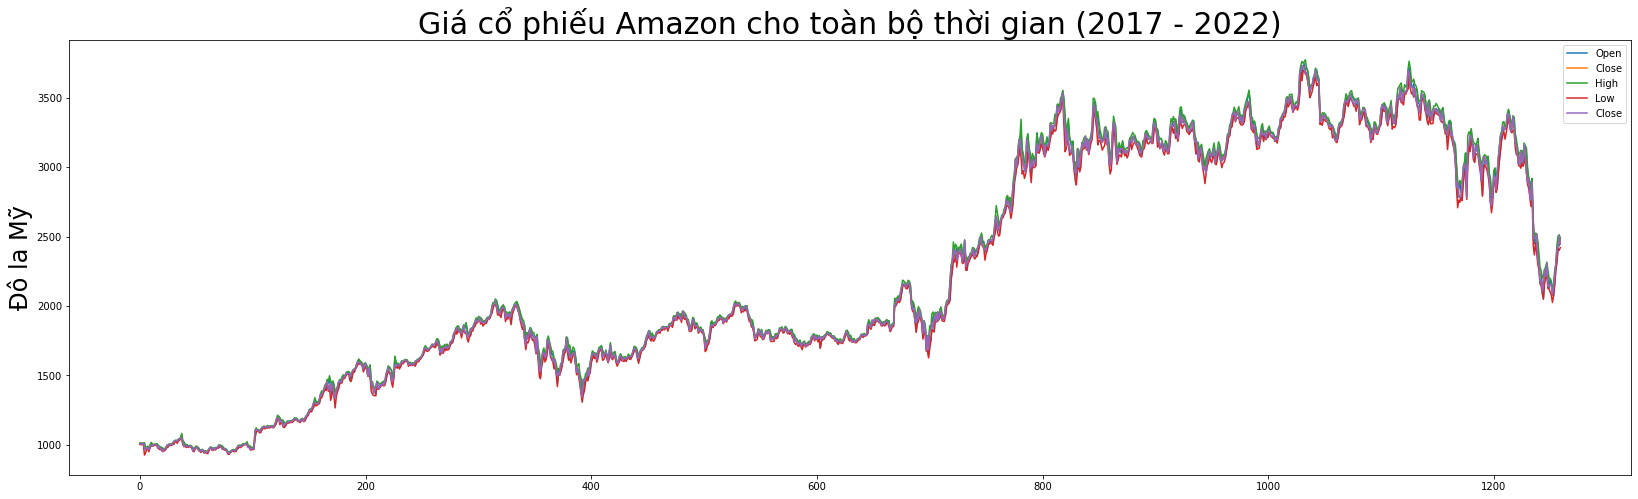

In [6]:
data[['Open', 'Close', 'High','Low','Close']].plot(figsize=(28,8))
plt.ylabel('Đô la Mỹ', fontsize = 24)
plt.title("Giá cổ phiếu Amazon cho toàn bộ thời gian (2017 - 2022)", fontsize=30)

    Lưu dữ liệu sau khi làm sạch vào file csv mới có tên là : clean_data.csv

In [7]:
filepath = Path('./clean data/clean_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath,index=False)  

    + Nếu chỉ sử dụng các biến có trong dataset thì rất khó để dự đoán vì sự biến thiên không nhiều. Bước tiếp theo chúng ta sẽ tạo thêm các đặc trưng mới.`

    + Không thể xử lý ngoại lệ hoặc giảm chiều cho bộ dataset này.